<a href="https://colab.research.google.com/github/AtSourav/AE-CatsnDogs-Continuous-Bernoulli/blob/main/AE_cats_n_dogs_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import losses
from keras import layers
from keras import utils
from keras import backend as K

import os
import matplotlib.pyplot as plt


In [2]:
input_size = (64,64,3)
latent_dim = 512
batch_size = 128

In [ ]:
! git clone https://github.com/AtSourav/CatsnDogs_img_dataset.git

Cloning into 'CatsnDogs_img_dataset'...
remote: Enumerating objects: 10444, done.
remote: Counting objects: 100% (4705/4705), done.
remote: Compressing objects: 100% (4704/4704), done.
remote: Total 10444 (delta 3), reused 4697 (delta 1), pack-reused 5739
Receiving objects: 100% (10444/10444), 68.94 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
img_dir = 'CatsnDogs_img_dataset/Dataset_aug/'
dir_size = len([imgs for imgs in os.listdir(img_dir)])data_train = utils.image_dataset_from_directory(img_dir, labels=None, validation_split=0.15, subset="training", seed=111, image_size=(160,160), color_mode='rgb', shuffle=True, batch_size=int(0.85*dir_size))

data_valid = utils.image_dataset_from_directory(img_dir, labels=None, validation_split=0.15, subset="validation", seed=111, image_size=(160,160), color_mode='rgb', shuffle=True, batch_size=int(0.15*dir_size))

for image_batch in data_train:
  print(image_batch.shape)
  break

for image_batch in data_valid:
  print(image_batch.shape)
  break


Found 5110 files belonging to 1 classes.
Using 4344 files for training.
Found 5110 files belonging to 1 classes.
Using 766 files for validation.
(4343, 160, 160, 3)
(766, 160, 160, 3)


In [ ]:
train_set = next(iter(data_train))
train_set = layers.Resizing(64, 64, interpolation="bilinear")(train_set)
train_set = train_set/255.
print(train_set.shape)

valid_set = next(iter(data_valid))
valid_set = layers.Resizing(64, 64, interpolation="bilinear")(valid_set)
valid_set = valid_set/255.
print(valid_set.shape)

(4343, 64, 64, 3)
(766, 64, 64, 3)


In [3]:
encoder_input = keras.Input(shape=input_size)

x = layers.Conv2D(8, 2, padding="same")(encoder_input)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(16, 2, padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(32, 2, padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(64, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(1024, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Conv2D(1024, 2, padding="valid")(x)
x = layers.ReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(2*latent_dim)(x)
x = layers.ReLU()(x)


z = layers.Dense(latent_dim, name="z")(x)

encoder = keras.Model(encoder_input, z, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         104       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 8)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 8)         32        
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        528 

In [4]:
latent_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(1*1*1024)(latent_input)
x = layers.ReLU()(x)
x = layers.Reshape((1,1,1024))(x)

x = layers.Conv2DTranspose(1024, 2, strides=2, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(1024, 2, strides=2, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 2, strides=2, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 2, strides=2, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(256, 2, strides=2, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(128, 2, strides=2, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(64, 2, strides=1, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(32, 2, strides=1, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(16, 2, strides=1, padding='same')(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(8, 2, strides=1, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

decoder_output = layers.Conv2DTranspose(3, 2, activation='sigmoid', strides=1, padding='same')(x)

decoder = keras.Model(latent_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_11 (ReLU)             (None, 1024)              0         
                                                                 
 reshape (Reshape)           (None, 1, 1, 1024)        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 2, 2, 1024)        4195328   
 anspose)                                                        
                                                                 
 re_lu_12 (ReLU)             (None, 2, 2, 1024)        0         
                                                           

Now let's instantiate the AE by combininb the encoder and the decoder layers.

In [5]:
decoder_out = decoder(encoder(encoder_input))
AE = keras.Model(encoder_input, decoder_out, name='AE')

AE.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 encoder (Functional)        (None, 512)               9617016   
                                                                 
 decoder (Functional)        (None, 64, 64, 3)         12762235  
                                                                 
Total params: 22379251 (85.37 MB)
Trainable params: 22379219 (85.37 MB)
Non-trainable params: 32 (128.00 Byte)
_________________________________________________________________


In [ ]:
K.clear_session()

In [ ]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=340, decay_rate=0.96, staircase=True)
optim = keras.optimizers.Adam(learning_rate = lr_decay)
AE.compile(optimizer=optim,loss='mse')
callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1, restore_best_weights=True, start_from_epoch=30 )

In [ ]:
history = VAE.fit(train_set, train_set, batch_size=batch_size, validation_data=(valid_set, valid_set), epochs=200, callbacks = [callback], steps_per_epoch=None)


Epoch 1/200
34/34 [==============================] - 18s 255ms/step - loss: 0.0184 - val_loss: 0.0270
Epoch 2/200
34/34 [==============================] - 8s 244ms/step - loss: 0.0116 - val_loss: 0.0290
Epoch 3/200
34/34 [==============================] - 8s 247ms/step - loss: 0.0101 - val_loss: 0.0256
Epoch 4/200
34/34 [==============================] - 8s 248ms/step - loss: 0.0104 - val_loss: 0.0269
Epoch 5/200
34/34 [==============================] - 8s 250ms/step - loss: 0.0103 - val_loss: 0.0262
Epoch 6/200
34/34 [==============================] - 9s 252ms/step - loss: 0.0098 - val_loss: 0.0267
Epoch 7/200
34/34 [==============================] - 9s 252ms/step - loss: 0.0098 - val_loss: 0.0260
Epoch 8/200
34/34 [==============================] - 9s 253ms/step - loss: 0.0097 - val_loss: 0.0263
Epoch 9/200
34/34 [==============================] - 9s 254ms/step - loss: 0.0096 - val_loss: 0.0262
Epoch 10/200
34/34 [==============================] - 9s 255ms/step - loss: 0.0093 - val_l

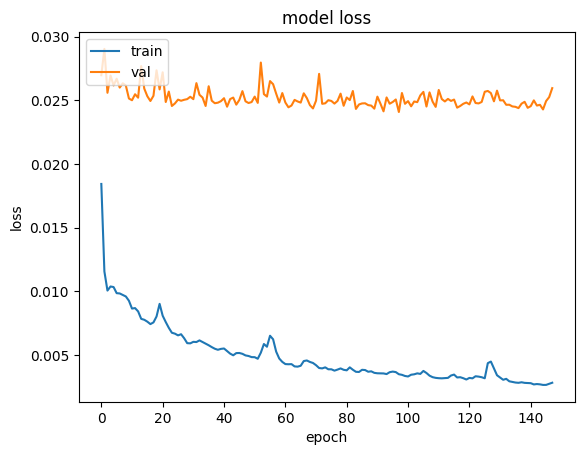

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def plot_reconstruction(set, name,seed_val):     #name should be either 'training' or 'validation'
  np.random.seed(seed_val)

  tg_indices = np.random.randint(0,set.shape[0],size = 16)
  img_sample = tf.convert_to_tensor(np.array(set)[tg_indices])
  z_sample = encoder(img_sample)
  img_recon = decoder(z_sample)

  recon = plt.figure(figsize=(18,8))
  recon.suptitle('Reconstructed images (right) from the ' + name + '-set: latent_dim = 512', fontweight= 'bold', y=0.93)

  recon.tight_layout()

  for i in range(36):
    recon.add_subplot(4,9,i+1)
    j = int(np.floor(i/9))
    if (i%9) <4:
      img = set[tg_indices[j*4 + (i%9)]]
      plt.imshow(img)
      plt.axis('off')
    elif (i%9)==4:
      img = np.ones((64,64,3))
      plt.imshow(img)
      plt.axis('off')
    else:
      img = img_recon[j*4 + (i%9) - 5]
      plt.imshow(img)
      plt.axis('off')

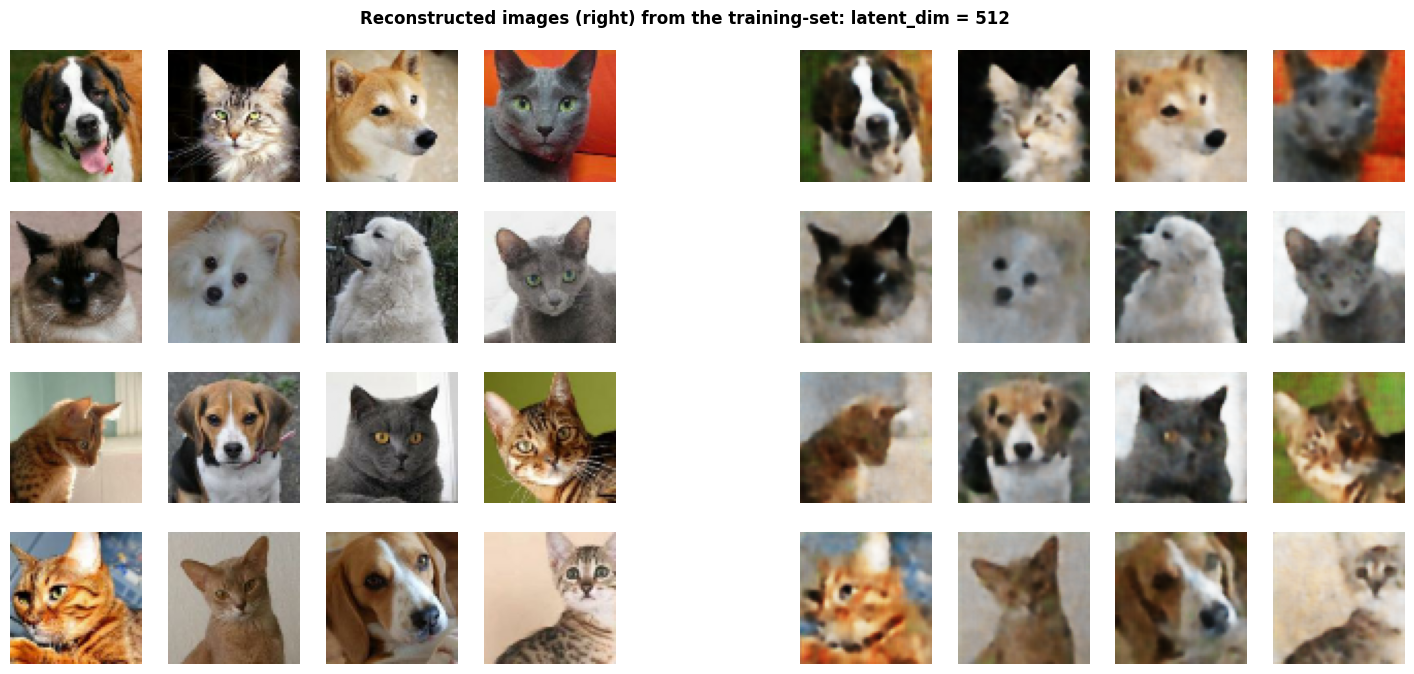

In [ ]:
plot_reconstruction(train_set,'training',333)

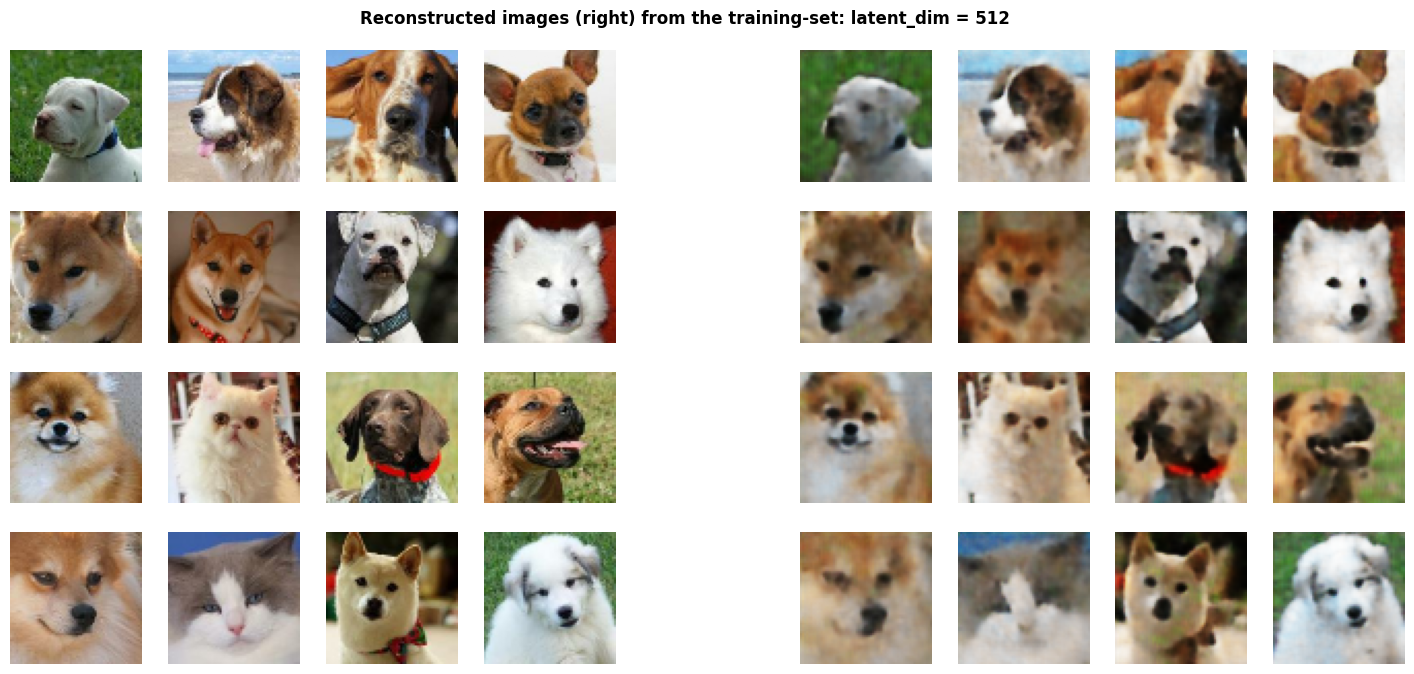

In [ ]:
plot_reconstruction(train_set,'training',5)

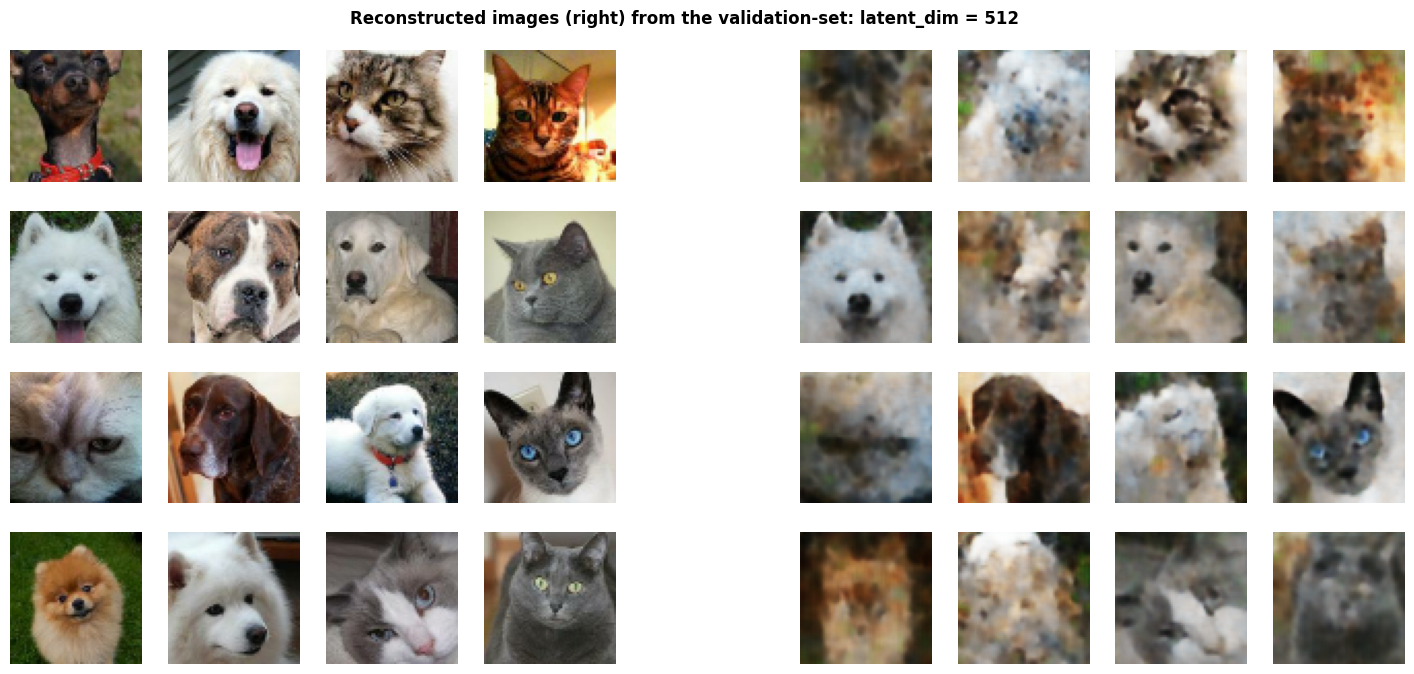

In [ ]:
plot_reconstruction(valid_set,'validation',100)

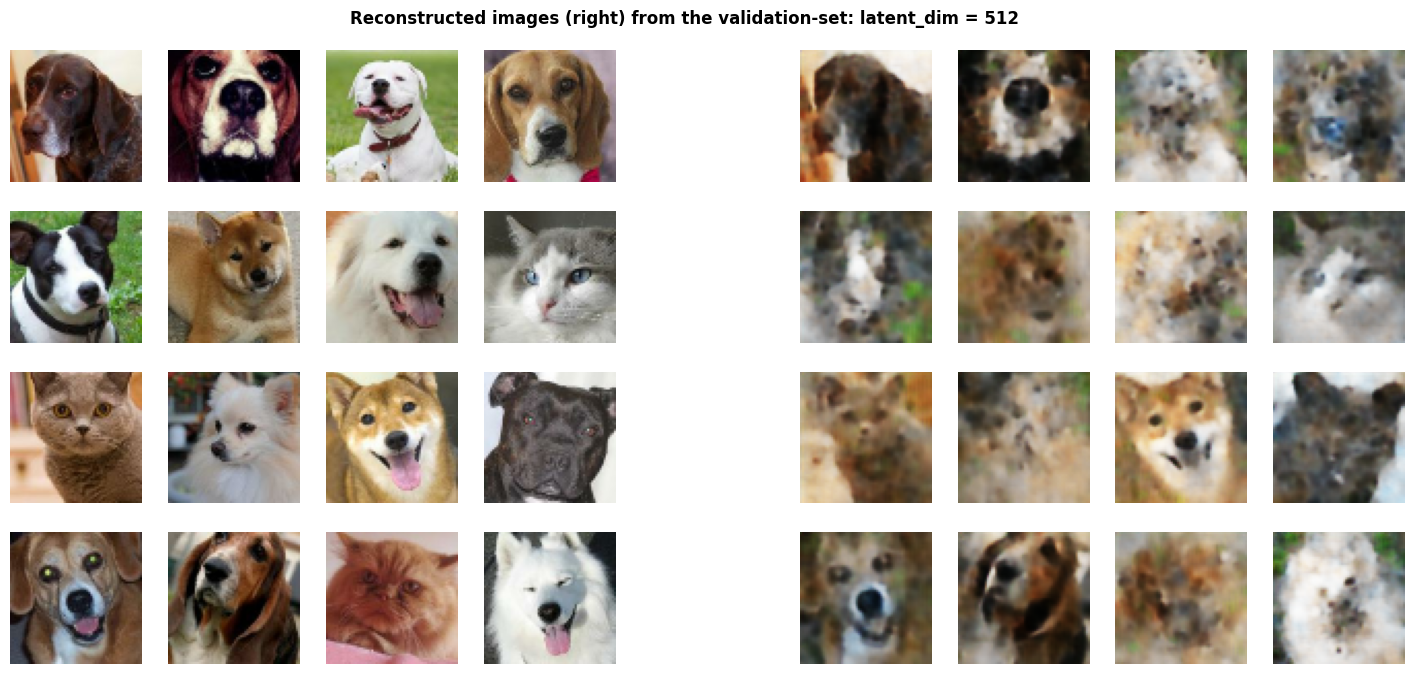

In [ ]:
plot_reconstruction(valid_set,'validation',111)